# Targets with low accuracy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)
from scipy import stats

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
target_df = pd.read_csv(target_list, index_col=0)
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,model_1_ptm_seed_0_rec_10_ens_1,0.981,0.980,0.919,0.910,0.901,0.955,0.900,0.032,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
1,model_1_ptm_seed_0_rec_10_ens_8,0.981,0.979,0.916,0.910,0.901,0.956,0.901,0.019,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
2,model_1_ptm_seed_0_rec_1_ens_1,0.981,0.980,0.917,0.909,0.901,0.944,0.895,20.749,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
3,model_1_ptm_seed_0_rec_1_ens_8,0.980,0.979,0.917,0.910,0.901,0.947,0.896,20.749,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
4,model_1_ptm_seed_0_rec_2_ens_1,0.981,0.979,0.919,0.911,0.903,0.948,0.897,0.172,model_1_ptm,...,158,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112595,model_5_seed_1_rec_7_ens_8,0.977,0.965,0.865,0.888,0.885,0.920,NaN,0.045,model_5,...,264,6SU3_X,1.500,2020-01-08T00:00:00Z,>6su3_X mol:protein length:264 48C12 heliorho...,MAKPTVKEIKSLQNFNRIAGVFHLLQMLAVLALANDFALPMTGTYL...,264,8,8,False
112596,model_5_seed_1_rec_8_ens_1,0.980,0.964,0.861,0.894,0.890,0.922,NaN,0.032,model_5,...,264,6SU3_X,1.500,2020-01-08T00:00:00Z,>6su3_X mol:protein length:264 48C12 heliorho...,MAKPTVKEIKSLQNFNRIAGVFHLLQMLAVLALANDFALPMTGTYL...,264,8,8,False
112597,model_5_seed_1_rec_8_ens_8,0.977,0.965,0.866,0.887,0.884,0.920,NaN,0.089,model_5,...,264,6SU3_X,1.500,2020-01-08T00:00:00Z,>6su3_X mol:protein length:264 48C12 heliorho...,MAKPTVKEIKSLQNFNRIAGVFHLLQMLAVLALANDFALPMTGTYL...,264,8,8,False
112598,model_5_seed_1_rec_9_ens_1,0.980,0.964,0.861,0.894,0.890,0.922,NaN,0.031,model_5,...,264,6SU3_X,1.500,2020-01-08T00:00:00Z,>6su3_X mol:protein length:264 48C12 heliorho...,MAKPTVKEIKSLQNFNRIAGVFHLLQMLAVLALANDFALPMTGTYL...,264,8,8,False


## Targets with low maximum GDT_TS

In [4]:
label = 'GDT_TS'
target_num = 20
gdtts_max_df = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmax()]).sort_values(label)
display(gdtts_max_df.head(target_num))
sample_targets_low_max_gdtts = gdtts_max_df.head(target_num).index.to_list()

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
Target,,,,,,,,,,,,,,,,,,,,,
6Z4U_A,model_2_seed_1_rec_10_ens_8,0.243,0.259,0.146,0.304,0.324,0.334,NaN,2.304,model_2,...,97,6Z4U_A,1.950,2020-11-25T00:00:00Z,>6z4u_A mol:protein length:97 Protein 9b,MDPKISEMHPALRLVDPQIQLAVTRMENAVGRDQNNVGPKVYPIIL...,97,4,4,False
7EL1_E,model_3_seed_0_rec_2_ens_8,0.487,0.474,0.347,0.415,0.415,0.455,NaN,4.775,model_3,...,100,7EL1_E,2.230,2021-01-13T00:00:00Z,>7el1_E mol:protein length:100 100AA,MKSVKYISNMSKQEKGYRVYVNVVNEDTDKGFLFPSVPKEVIENDK...,100,1,1,False
6NNW_A,model_2_ptm_seed_1_rec_10_ens_1,0.760,0.695,0.538,0.654,0.644,0.739,0.665,0.204,model_2_ptm,...,208,6NNW_A,1.700,2019-07-24T00:00:00Z,>6nnw_A mol:protein length:208 Tetronasin,SHMTTSIDPTTPLTYNPVIDALVGSWRQIIDADYSADDTRLPDLAV...,208,4,4,False
6RO0_B,model_5_ptm_seed_0_rec_5_ens_1,0.823,0.712,0.506,0.773,0.766,0.741,0.639,1.480,model_5_ptm,...,226,6RO0_B,2.135,2018-12-19T00:00:00Z,>6ro0_B mol:protein length:226 Islet-activati...,MPIDRKTLCHLLSVLPLALLGSHVARASTPGIVIPPQEQITQHGSP...,226,4,4,False
7N50_A,model_1_ptm_seed_1_rec_6_ens_8,0.828,0.712,0.503,NaN,NaN,0.746,0.755,0.293,model_1_ptm,...,259,7N50_A,1.500,2021-08-11T00:00:00Z,>7n50_A mol:protein length:259 Gasdermin,SNCSRDTGDELMAALLAEGINLILPPRDNIAPGDLIIADPQGGARL...,259,1,1,False
6W40_A,model_3_ptm_seed_0_rec_2_ens_8,0.748,0.742,0.575,0.648,0.652,0.884,0.783,0.242,model_3_ptm,...,120,6W40_A,2.497,2020-05-20T00:00:00Z,>6w40_A mol:protein length:120 DENOVO NTF2,GDEEEKHLRDMMEIVIKLFMTGDWDAFHEMADPDVKFQVDVGDKHI...,120,2,2,False
6JFK_A,model_2_seed_0_rec_9_ens_1,0.860,0.771,0.627,0.778,0.753,0.881,NaN,0.114,model_2,...,438,6JFK_A,1.999,2018-07-18T00:00:00Z,">6jfk_A mol:protein length:438 Mitofusin-2,cD...",GPHMGGSAEVNASPLKHFVTAKKKINGIFEQLGAYIQESATFLEDT...,438,19,7,True
5Z49_B,model_2_seed_0_rec_3_ens_1,0.896,0.785,0.608,0.815,0.807,0.869,NaN,0.359,model_2,...,239,5Z49_B,2.150,2018-08-15T00:00:00Z,>5z49_B mol:protein length:239 HTH-type trans...,MGHHHHHHMGQLRLAVITTAKYFIPRLIGPFCQRYPGINVSLKVTN...,239,3,2,True
6CZQ_B,model_5_ptm_seed_0_rec_1_ens_1,0.776,0.792,0.676,0.714,0.695,0.836,0.640,29.973,model_5_ptm,...,95,6CZQ_B,2.200,2019-01-30T00:00:00Z,>6czq_B mol:protein length:95 Small conductan...,GRKLELTKAEKHFHNFMMDTQLTKRVKNAAANVLRETWLIYKNTKL...,95,13,2,True


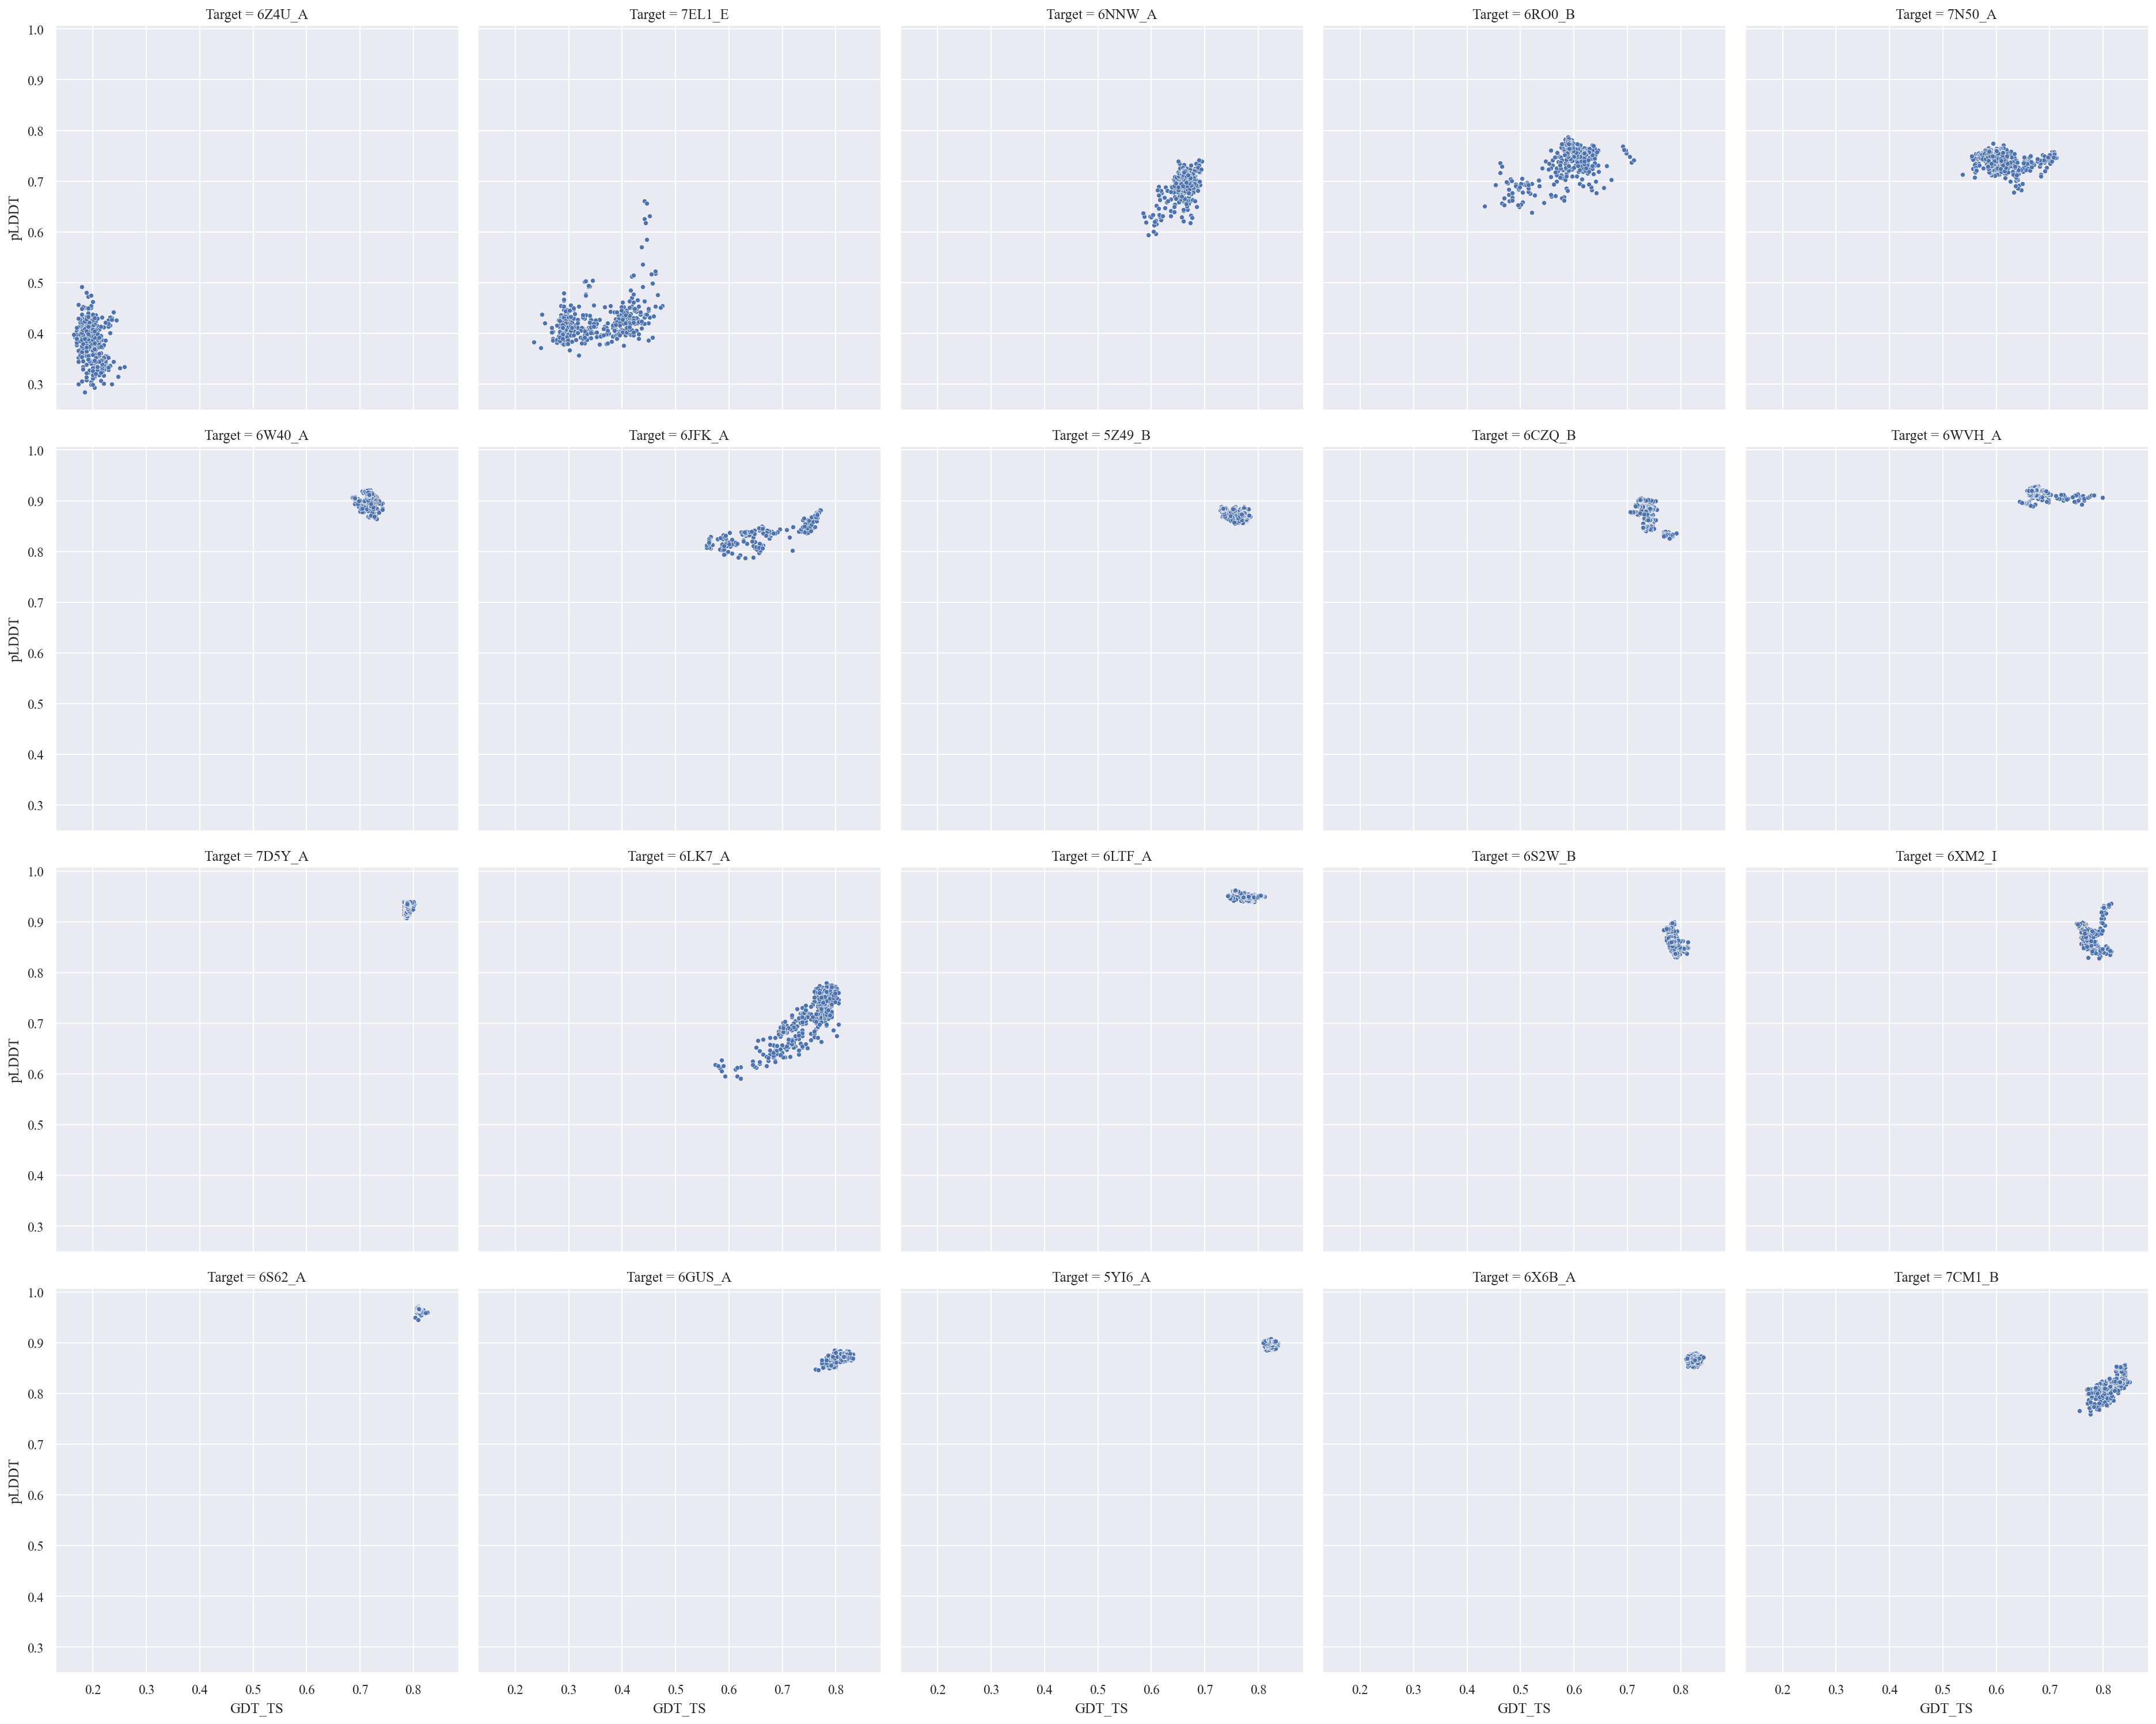

In [5]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets_low_max_gdtts)
method = 'pLDDT'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets_low_max_gdtts, s=15)

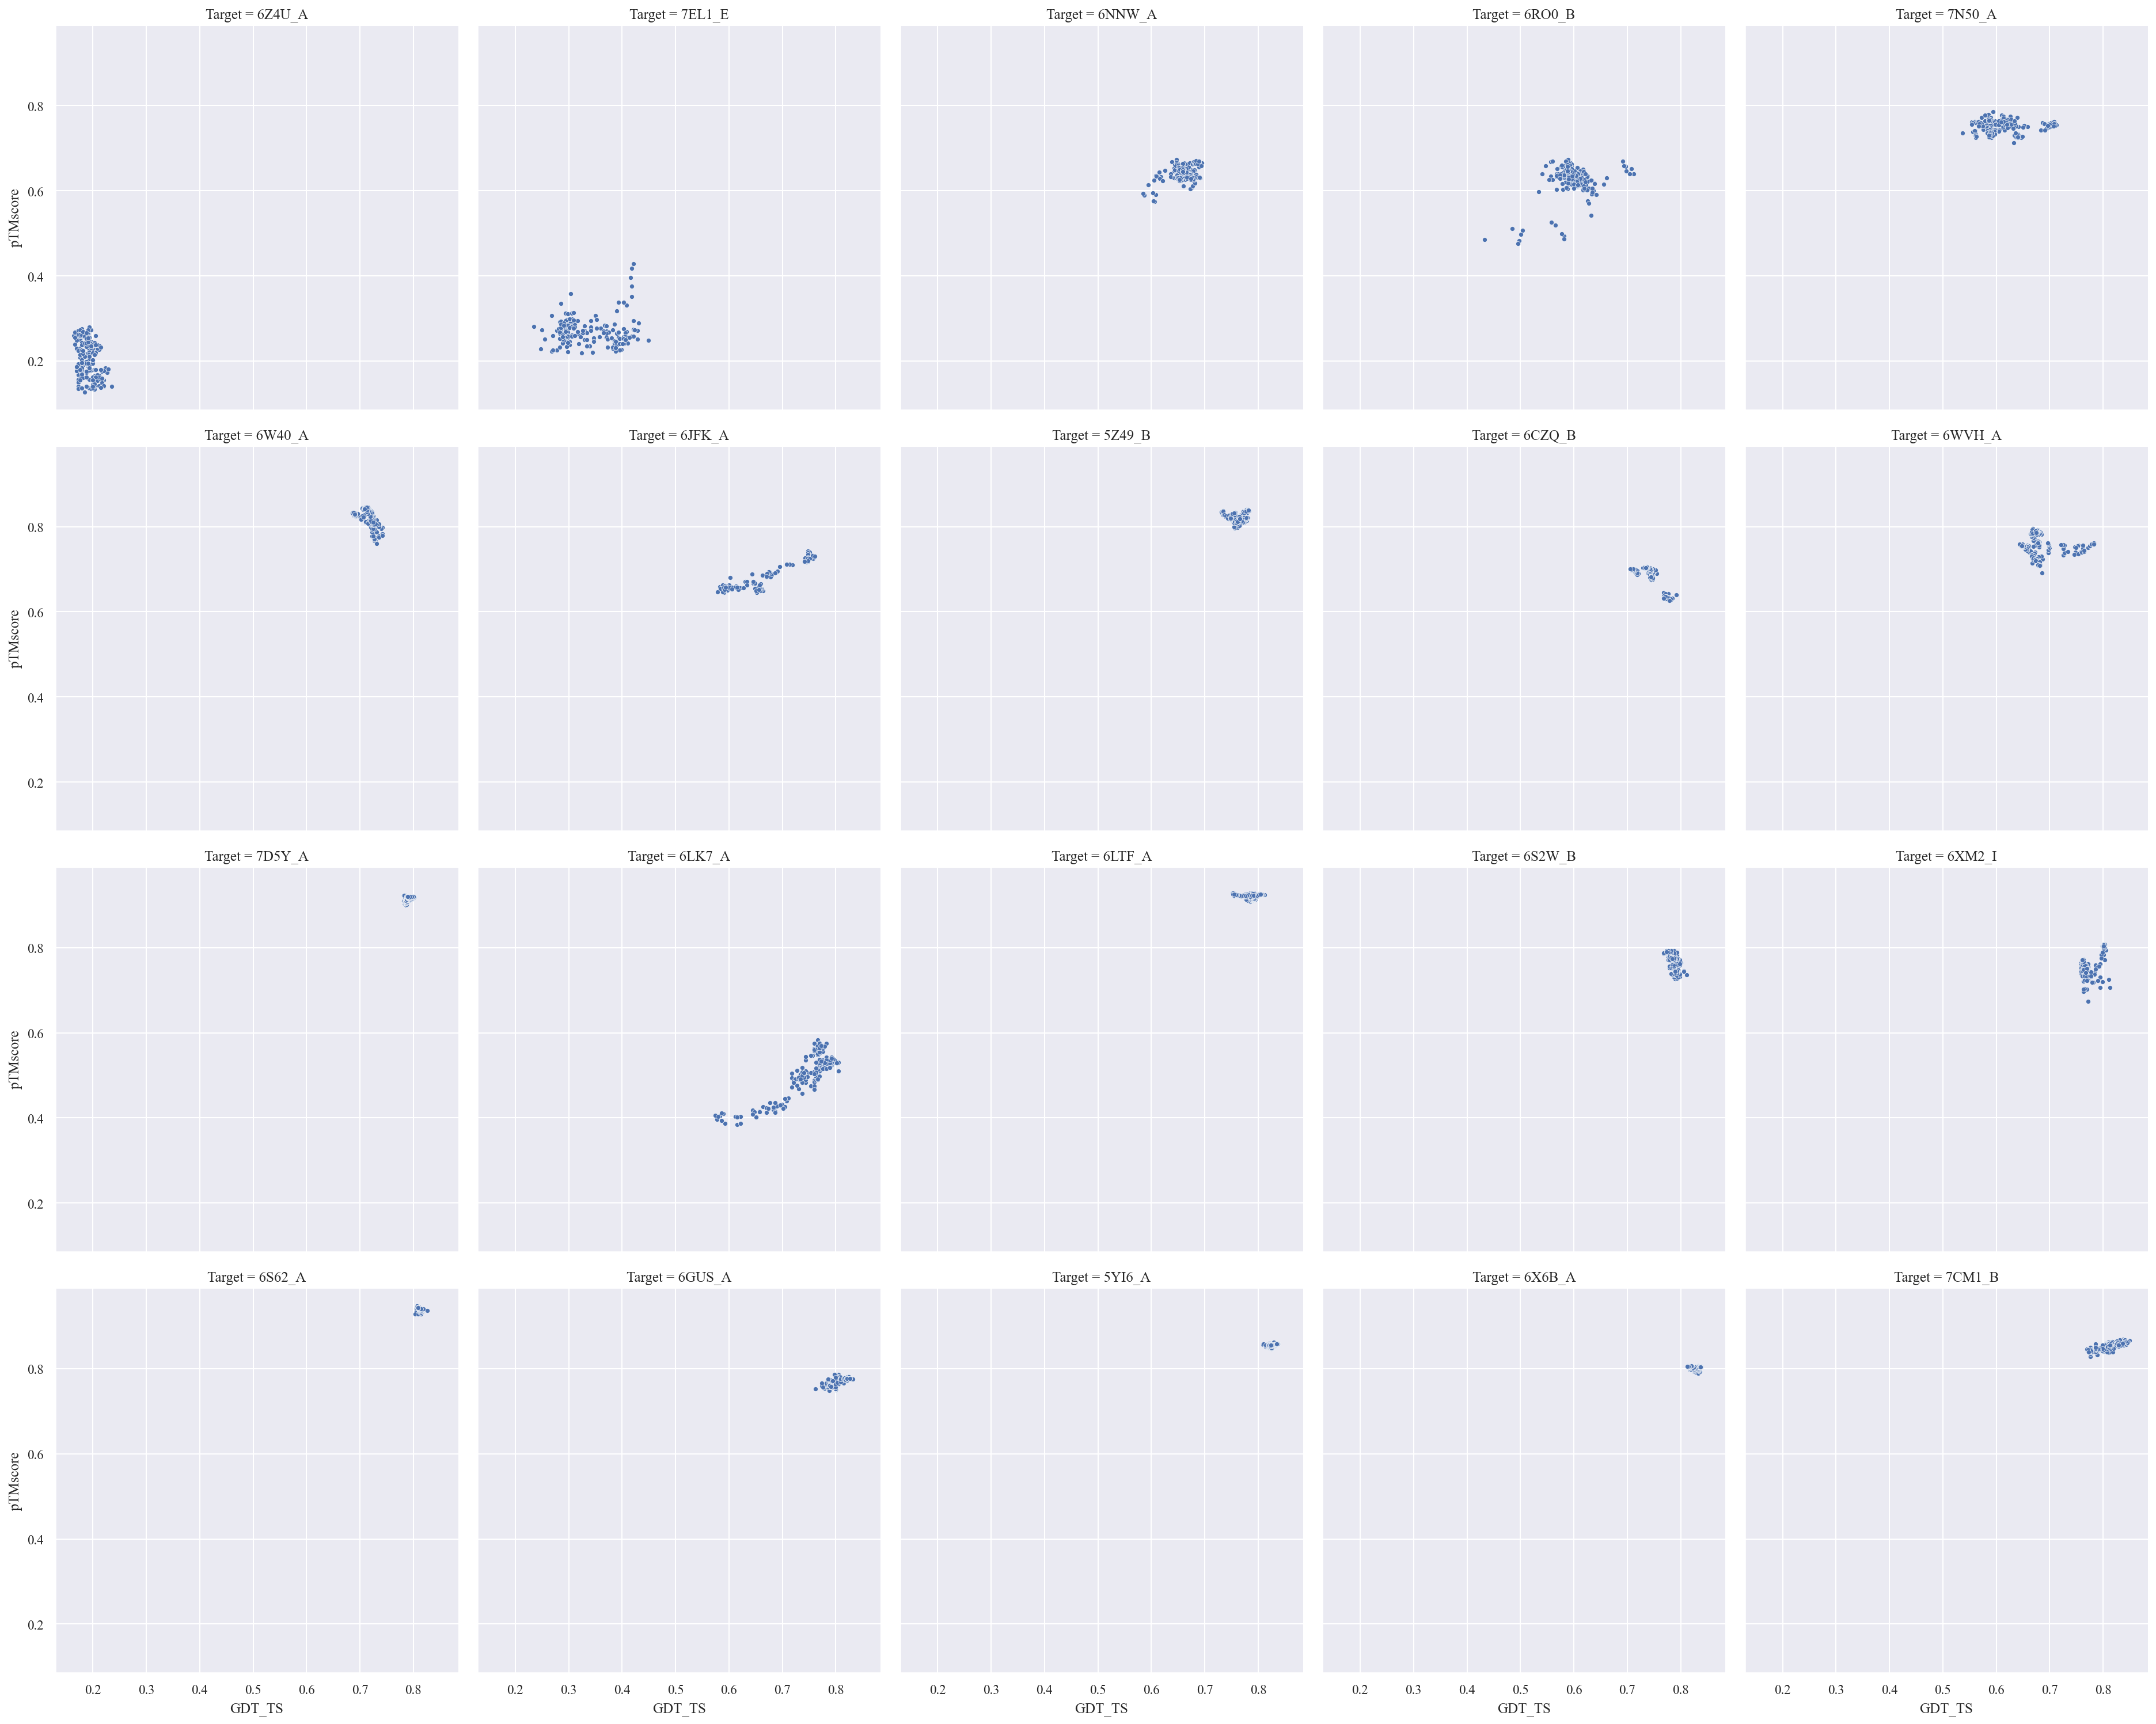

In [6]:
data = df.groupby('Target').filter(lambda x: x.name in sample_targets_low_max_gdtts)
method = 'pTMscore'
label = 'GDT_TS'
x, y = label, method
sns.relplot(data=data, x=x, y=y, kind='scatter', col='Target', col_wrap=5, col_order=sample_targets_low_max_gdtts, s=15)

## Targets with a low GDT_TS model

In [7]:
label = 'GDT_TS'
target_num = 20
gdtts_min_df = df.groupby('Target').apply(lambda x: x.loc[x[label].idxmin()]).sort_values(label)
display(gdtts_min_df.head(target_num))
sample_targets_with_low_gdtts = gdtts_min_df.head(target_num).index.to_list()

,Model,TMscore,GDT_TS,GDT_HA,Global_LDDT,Mean_LDDT,pLDDT,pTMscore,Tolerance,ModelName,...,Length,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
Target,,,,,,,,,,,,,,,,,,,,,
6Z4U_A,model_1_ptm_seed_0_rec_6_ens_8,0.162,0.164,0.110,0.260,0.272,0.397,0.260,1.743,model_1_ptm,...,97,6Z4U_A,1.950,2020-11-25T00:00:00Z,>6z4u_A mol:protein length:97 Protein 9b,MDPKISEMHPALRLVDPQIQLAVTRMENAVGRDQNNVGPKVYPIIL...,97,4,4,False
7EL1_E,model_2_ptm_seed_1_rec_1_ens_1,0.233,0.235,0.161,0.275,0.278,0.383,0.281,20.833,model_2_ptm,...,100,7EL1_E,2.230,2021-01-13T00:00:00Z,>7el1_E mol:protein length:100 100AA,MKSVKYISNMSKQEKGYRVYVNVVNEDTDKGFLFPSVPKEVIENDK...,100,1,1,False
5VTL_A,model_1_ptm_seed_1_rec_6_ens_1,0.428,0.356,0.283,0.451,0.459,0.490,0.470,5.194,model_1_ptm,...,210,5VTL_A,1.830,2018-08-08T00:00:00Z,>5vtl_A mol:protein length:210 Tb427.07.360- ...,QNTVSHVSAACLFSEALHGIPFGVKVLKALAAANVSDASKAREGCQ...,210,1,1,False
6EXU_A,model_2_seed_0_rec_2_ens_1,0.432,0.427,0.310,NaN,NaN,0.641,NaN,2.086,model_2,...,116,6EXU_A,1.410,2020-04-08T00:00:00Z,>6exu_A mol:protein length:116 Switch-activat...,LSPSSSPAKAQRTHLSLEEKIKLMRLVVRHKHELVDRKTSEFYAKI...,116,3,2,True
6RO0_B,model_5_ptm_seed_0_rec_1_ens_8,0.493,0.433,0.311,0.601,0.597,0.651,0.485,36.659,model_5_ptm,...,226,6RO0_B,2.135,2018-12-19T00:00:00Z,>6ro0_B mol:protein length:226 Islet-activati...,MPIDRKTLCHLLSVLPLALLGSHVARASTPGIVIPPQEQITQHGSP...,226,4,4,False
6HLK_A,model_1_ptm_seed_0_rec_7_ens_1,0.494,0.502,0.339,NaN,NaN,0.807,0.728,0.512,model_1_ptm,...,153,6HLK_A,2.426,2019-12-04T00:00:00Z,>6hlk_A mol:protein length:153 Redirecting ph...,MSEKEFFLSQQEIADQFGVDRTTVRAWTKRGLPFIEGDKGKPGRYQ...,153,2,2,False
7N50_A,model_4_ptm_seed_1_rec_1_ens_1,0.685,0.537,0.339,NaN,NaN,0.714,0.735,28.243,model_4_ptm,...,259,7N50_A,1.500,2021-08-11T00:00:00Z,>7n50_A mol:protein length:259 Gasdermin,SNCSRDTGDELMAALLAEGINLILPPRDNIAPGDLIIADPQGGARL...,259,1,1,False
6JFK_A,model_4_seed_1_rec_2_ens_1,0.622,0.558,0.461,0.713,0.694,0.808,NaN,0.718,model_4,...,438,6JFK_A,1.999,2018-07-18T00:00:00Z,">6jfk_A mol:protein length:438 Mitofusin-2,cD...",GPHMGGSAEVNASPLKHFVTAKKKINGIFEQLGAYIQESATFLEDT...,438,19,7,True
6LK7_A,model_2_ptm_seed_1_rec_10_ens_8,0.551,0.574,0.433,0.615,0.603,0.618,0.406,0.847,model_2_ptm,...,85,6LK7_A,1.907,2020-01-08T00:00:00Z,>6lk7_A mol:protein length:85 Nitrile hydrata...,MSTKVNQERLASVVGRALLDKDFAAQLHQDPEAAAKGIGVHLSATE...,85,4,4,False


In [8]:
set(sample_targets_with_low_gdtts) - set(sample_targets_low_max_gdtts)

{'5VTL_A',
 '6EXU_A',
 '6GT9_A',
 '6HLK_A',
 '6TJB_B',
 '6TNJ_A',
 '6UWA_A',
 '6XXV_C'}

## Targets with low GDT_TS and high mean-LDDT

In [9]:
df.query('GDT_TS < 0.6 and Mean_LDDT > 0.8')['Target'].unique()

array([], dtype=object)